In [1]:
import sys

sys.path.append("..")

# Analiza i Wygładzanie Danych za pomocą Średniej Ruchomej

## Opis Zadania
Zadanie polega na analizie danych numerycznych przy użyciu metody średniej ruchomej. Średnia ruchoma jest często stosowana do wygładzania danych, eliminacji szumów oraz identyfikacji trendów. W ramach tego zadania należy:

1. Wczytać zestaw danych zapisany w pliku tekstowym.
2. Zaimplementować funkcję obliczającą średnią ruchomą dla podanych danych.
3. Zwizualizować wyniki w postaci wykresów.

## Teoria Średniej Ruchomej
Średnia ruchoma (ang. *Moving Average*) to metoda analizy danych polegająca na obliczaniu średniej wartości na podstawie sąsiednich punktów w określonym przedziale czasowym (oknie).

Definicja średniej ruchomej dla zbioru danych $ x_1, x_2, \dots, x_n $ i okna $ w $ jest następująca:

$$
MA_i = \frac{1}{w} \sum_{j=i}^{i+w-1} x_j, \quad \text{dla } i = 1, 2, \dots, n - w + 1.
$$

gdzie:
- $ MA_i $ – średnia ruchoma dla pozycji $ i $,
- $ w $ – szerokość okna,
- $ x_j $ – wartości danych wejściowych.


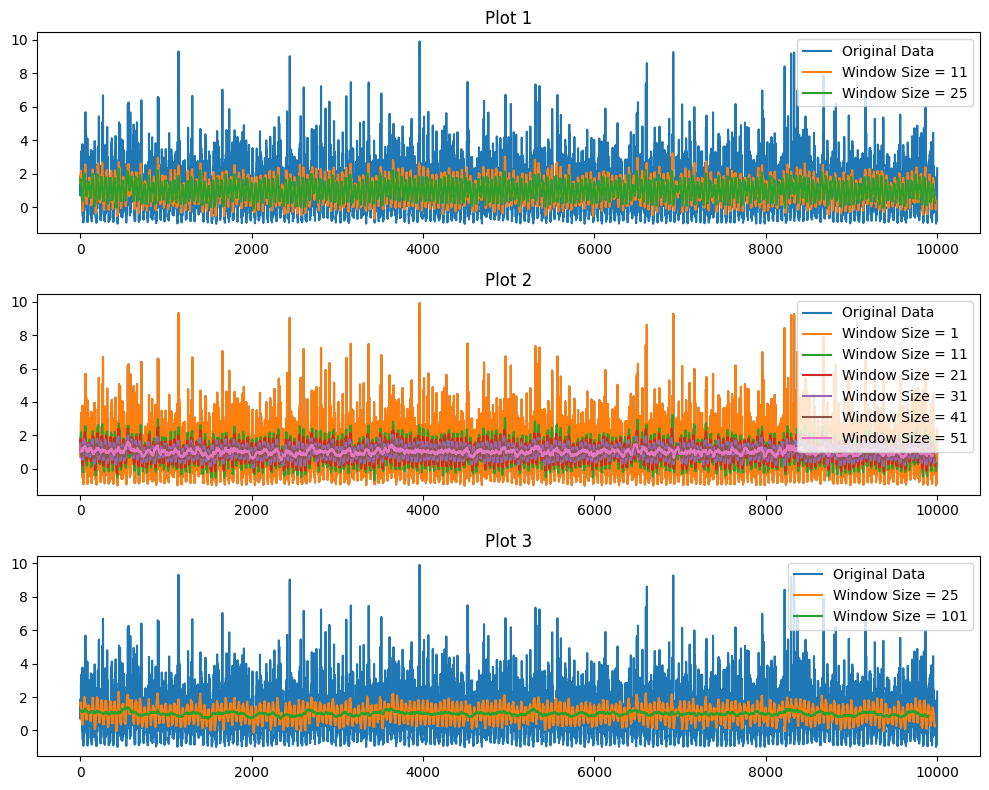

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.functions import moving_average


# Plotting the data
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Load the data
data = np.loadtxt("../data/set_1/dane2.txt")

# Plot the original data and moving averages
for i in range(3):
    axs[i].plot(data, label="Original Data")

axs[0].plot(moving_average(data, 11), label="Window Size = 11")
axs[0].plot(moving_average(data, 25), label="Window Size = 25")

for window_size in range(1, 60, 10):
    axs[1].plot(moving_average(data, window_size), label=f"Window Size = {window_size}")

axs[2].plot(moving_average(data, 25), label="Window Size = 25")
axs[2].plot(moving_average(data, 101), label="Window Size = 101")

# Add legends and titles
for i, ax in enumerate(axs):
    ax.legend()
    ax.set_title(f"Plot {i + 1}")

plt.tight_layout()
plt.show()

## Opis Zadania  
Zadanie polega na przeprowadzeniu analizy regresji liniowej metodą najmniejszych kwadratów. Celem jest wyznaczenie współczynników regresji dla dwóch zbiorów danych i porównanie ich z dopasowaną linią wielomianową.  

### Kluczowe kroki:  
1. **Wczytanie danych** – załadowanie dwóch zbiorów danych numerycznych z plików tekstowych.  
2. **Obliczenie współczynników regresji** – wykorzystanie metody najmniejszych kwadratów do wyznaczenia współczynnika kierunkowego $ b_1 $ oraz wyrazu wolnego $ b_0 $ dla modelu regresji liniowej:  
   $$
   y = b_1 x + b_0
   $$
3. **Porównanie wyników** – dopasowanie danych zarówno za pomocą regresji liniowej, jak i aproksymacji wielomianowej, a następnie wizualizacja wyników.  

### Teoria  
Współczynnik nachylenia linii regresji $ b_1 $ można obliczyć jako:  
$$
b_1 = \frac{\sum (x_i y_i) - n \cdot \bar{x} \cdot \bar{y}}{\sum x_i^2 - n \cdot \bar{x}^2}
$$
Natomiast wyraz wolny $ b_0 $ jest dany wzorem:  
$$
b_0 = \bar{y} - b_1 \cdot \bar{x}
$$
gdzie $ \bar{x} $ i $ \bar{y} $ są średnimi wartościami zmiennych.  

4. **Wizualizacja danych** – utworzenie wykresu rozrzutu, dodanie linii regresji oraz porównanie z aproksymacją wielomianową.  

### Oczekiwany Wynik  
Wykres przedstawiający punkty danych, linię regresji obliczoną metodą najmniejszych kwadratów oraz linię dopasowaną metodą wielomianową.

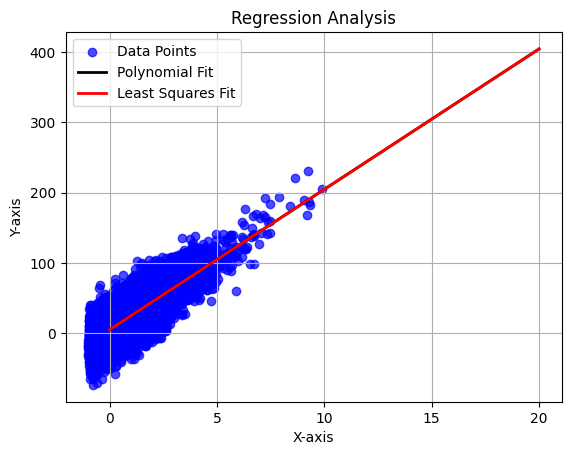

In [3]:
from src.functions import moving_average, calculate_regression_coefficients

# Load data from files
x = np.loadtxt("../data/set_1/dane2.txt")
y = np.loadtxt("../data/set_1/dane3.txt")

# Calculate regression coefficients
b1, b0 = calculate_regression_coefficients(x, y)

# Generate points for the regression line
xs = np.linspace(0, 20, 100)

# Fit a polynomial for comparison
polynomial_fit = np.polyfit(x, y, 1)

# Plot the data and regression lines
plt.scatter(x, y, label="Data Points", color="blue", alpha=0.7)
plt.plot(
    xs,
    polynomial_fit[0] * xs + polynomial_fit[1],
    color="black",
    label="Polynomial Fit",
    linewidth=2,
)
plt.plot(xs, b1 * xs + b0, color="red", label="Least Squares Fit", linewidth=2)

# Add labels, legend, and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Regression Analysis")
plt.legend()
plt.grid(True)
plt.show()

## Zadanie: 
Filtrowanie Danych na Podstawie Regresji
Opis Zadania
Celem zadania jest analiza zależności między dwiema zmiennymi poprzez regresję liniową oraz odfiltrowanie wartości odstających. Proces obejmuje wyznaczenie linii regresji, obliczenie odległości punktów od tej linii oraz odrzucenie punktów, które znajdują się poza określonym progiem.


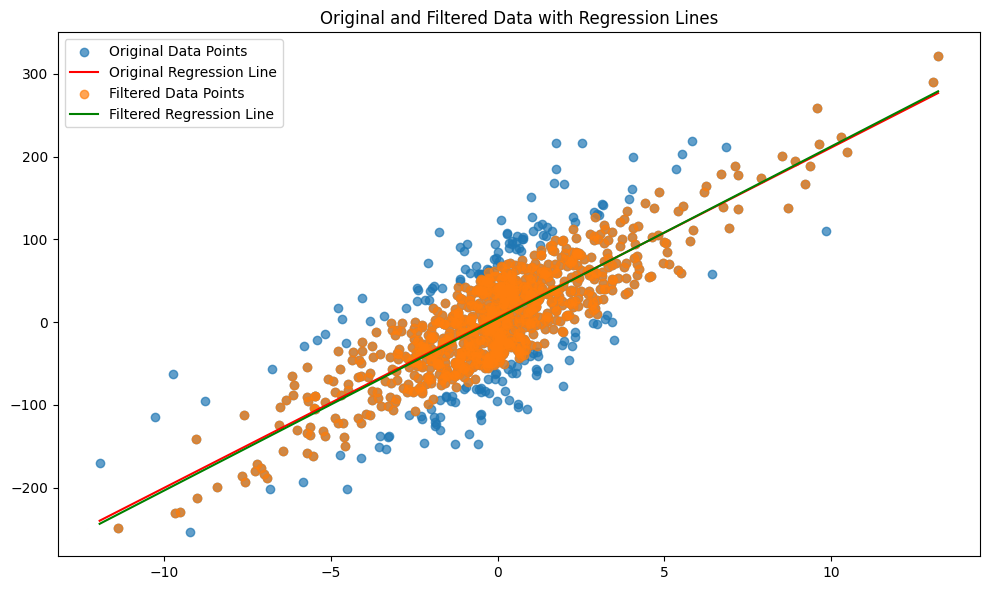

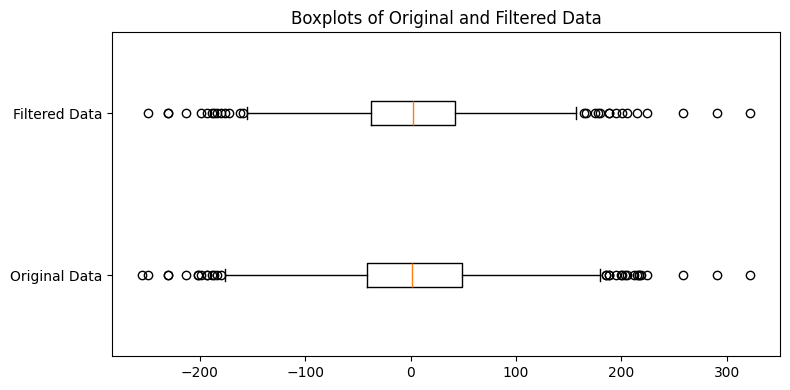

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from src.functions import calculate_regression_coefficients, calculate_point_distances

# Load data
data = np.loadtxt("../data/set_1/dane4.txt")
x = data[:, 0]
y = data[:, 1]

# Generate x values for plotting the regression line
x_plot = np.linspace(min(x), max(x), 100)

# Calculate initial regression coefficients
slope, intercept = calculate_regression_coefficients(x, y)

# Calculate distances of points from the regression line
distances = calculate_point_distances(x, y, slope, intercept)
max_distance = 3

# Filter points based on distance from the regression line
filtered_x = x[distances < max_distance]
filtered_y = y[distances < max_distance]

# Calculate regression coefficients for filtered data
filtered_slope, filtered_intercept = calculate_regression_coefficients(
    filtered_x, filtered_y
)

# Plot original data, regression line, filtered data, and filtered regression line in one subplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Original Data Points", alpha=0.7)
plt.plot(
    x_plot, slope * x_plot + intercept, color="red", label="Original Regression Line"
)
plt.scatter(filtered_x, filtered_y, label="Filtered Data Points", alpha=0.7)
plt.plot(
    x_plot,
    filtered_slope * x_plot + filtered_intercept,
    color="green",
    label="Filtered Regression Line",
)
plt.title("Original and Filtered Data with Regression Lines")
plt.legend()
plt.tight_layout()
plt.show()

# Boxplots of original and filtered data side by side
plt.figure(figsize=(8, 4))
plt.boxplot([y, filtered_y], vert=False, labels=["Original Data", "Filtered Data"])
plt.title("Boxplots of Original and Filtered Data")
plt.tight_layout()
plt.show()

### **Opis Zadania: Dopasowanie Funkcji Wykładniczej do Danych**

Celem zadania jest dopasowanie funkcji wykładniczej do zbioru danych. Należy wyznaczyć parametry funkcji wykładniczej w postaci:

$$
y = a \cdot e^{(b \cdot x + c)} + d
$$

gdzie $ a $, $ b $, $ c $, $ d $ to parametry funkcji, które mają zostać dopasowane do danych. Do tego celu wykorzystana zostanie metoda optymalizacji, która zminimalizuje sumę kwadratów błędów między wartościami danych a wartościami przewidywanymi przez funkcję.

Po dopasowaniu funkcji, należy wygenerować wykres, który pokaże:
- Oryginalne dane (punkty pomiarowe),
- Dopasowaną funkcję wykładniczą wraz z wartościami wyliczonych parametrów.

Dodatkowo, wynik zadania powinien zawierać równanie funkcji wykładniczej z dopasowanymi parametrami $ a $, $ b $, $ c $, $ d $.

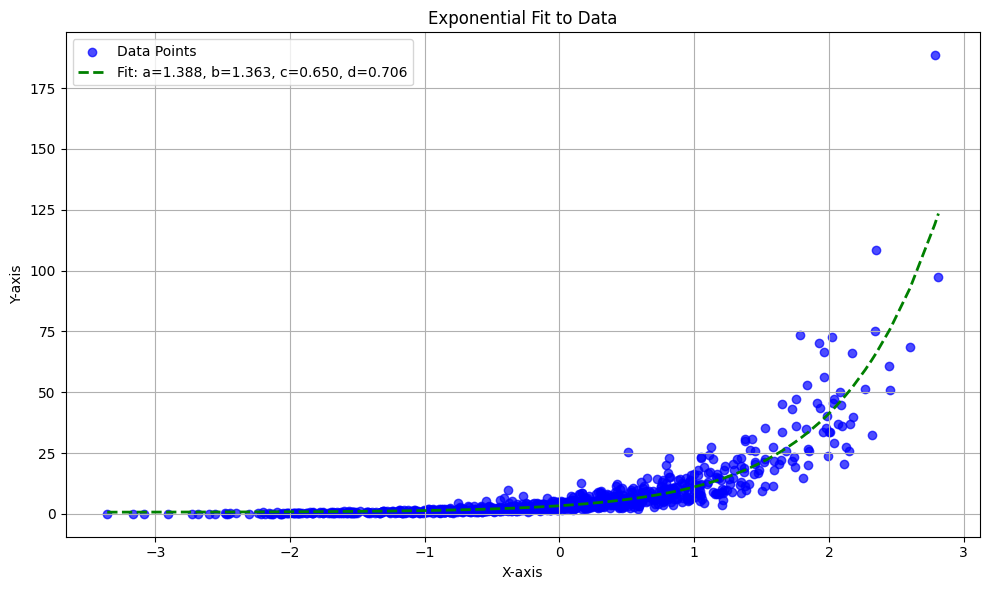

Fitted function: y = 1.3875 * exp(1.3626 * x + 0.6495) + 0.7059


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def exponential_function(x, a, b, c, d):
    """
    Defines the exponential function to fit the data.

    Parameters:
    - x: numpy.ndarray, independent variable
    - a, b, c, d: float, parameters of the exponential function

    Returns:
    - numpy.ndarray, computed values of the function
    """
    return a * np.exp(b * x + c) + d


# Load data from file
data = np.loadtxt("../data/set_1/dane6.txt")
x = data[:, 0]
y = data[:, 1]

# Fit the exponential function to the data
popt, pcov = curve_fit(exponential_function, x, y)

# Generate sorted x values for plotting the fitted curve
x_sorted = np.sort(x)
y_fitted = exponential_function(x_sorted, *popt)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data Points", color="blue", alpha=0.7)
plt.plot(
    x_sorted,
    y_fitted,
    "g--",
    label="Fit: a=%.3f, b=%.3f, c=%.3f, d=%.3f" % tuple(popt),
    linewidth=2,
)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Exponential Fit to Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the fitted function
print("Fitted function: y = %.4f * exp(%.4f * x + %.4f) + %.4f" % tuple(popt))